###   Data Cleaning and make use ful data 

In [1]:
# load a some library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# load a data download from kaggle Bengaluru_House_Data 

In [2]:
df = pd.read_csv("C:\\Users\\ccpoint\\Downloads\\Bengaluru_House_Data.csv")
print(df.head(10))
print("shape of dataframe is ",df.shape)

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   
5  Super built-up  Area  Ready To Move                Whitefield      2 BHK   
6  Super built-up  Area         18-May          Old Airport Road      4 BHK   
7  Super built-up  Area  Ready To Move              Rajaji Nagar      4 BHK   
8  Super built-up  Area  Ready To Move              Marathahalli      3 BHK   
9            Plot  Area  Ready To Move              Gandhi Bazar  6 Bedroom   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0

# now  check nan value in data

In [3]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# Drop features that are not required to build our model

In [4]:
df=df.drop(['area_type','society','balcony','availability'],axis='columns')
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
# now again check nan value
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

# handle a nan value

In [6]:
df["bath"] = df["bath"].fillna(0)
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [7]:
df = df.dropna()
df.shape

(13303, 5)

In [8]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [9]:
df["BHK"]=df["size"].apply(lambda x: int(x.split(" ")[0]) )
df.head(10)

C:\Users\ccpoint\AppData\Local\Temp\ipykernel_12328\3300785376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BHK"]=df["size"].apply(lambda x: int(x.split(" ")[0]) )


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [10]:
df.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [11]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

array(['1056', '2600', '1440', ..., **'1133 - 1384'**, '774', '4689'], in this output some value in range it arise a error in model 
####  so resolve it 

In [12]:
# check it total_sqft is float or not
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
df[~df["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,0.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,0.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,0.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


##  above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [14]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [15]:
df["total_sqft"]=df["total_sqft"].apply(convert_sqft_to_num)


C:\Users\ccpoint\AppData\Local\Temp\ipykernel_12328\4186951404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_sqft"]=df["total_sqft"].apply(convert_sqft_to_num)


In [16]:
df = df[df.total_sqft.notnull()]

In [17]:
df.head(40)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [18]:
df.shape

(13257, 6)

In [19]:
# Add new feature called price per square feet
df1=df.copy()
df1["price_per_sqft"]=df.price*100000/df.total_sqft
df1.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [20]:
# now come to location
df.location.unique()
len(df.location.unique())

1298

### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [21]:
location_stats = df1['location'].value_counts(ascending=False)
location_stats

Whitefield                   537
Sarjapur  Road               397
Electronic City              302
Kanakpura Road               271
Thanisandra                  233
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: location, Length: 1298, dtype: int64

In [22]:
lnn=location_stats[location_stats>10]
lnn

Whitefield          537
Sarjapur  Road      397
Electronic City     302
Kanakpura Road      271
Thanisandra         233
                   ... 
HAL 2nd Stage        11
LB Shastri Nagar     11
Tindlu               11
Marsur               11
Bommenahalli         11
Name: location, Length: 240, dtype: int64

In [23]:
len(location_stats[location_stats<=10])

1058

## Dimensionality Reduction
#### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [24]:
other = location_stats[location_stats<=10]
other

Ganga Nagar                  10
Nagappa Reddy Layout         10
Naganathapura                10
Sadashiva Nagar              10
Basapura                     10
                             ..
Indiranagar HAL 2nd Stage     1
Maruthi HBCS Layout           1
K R C kothanur                1
1Channasandra                 1
Abshot Layout                 1
Name: location, Length: 1058, dtype: int64

In [25]:
len(df1.location.unique())

1298

In [26]:
df1.location = df1.location.apply(lambda x: 'other' if x in other else x)
len(df1.location.unique())


241

## Outlier Removal Using Business Logic

In [27]:
df1[df1.total_sqft/df1.BHK<300].head()


,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


# check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

In [28]:
df2=df1[~(df1.total_sqft/df.BHK<300)]
df2.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [29]:
df2.shape

(12513, 7)

##### now lets check any  data error in price_per_sqft

In [30]:
df2.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Text(0, 0.5, 'Count')

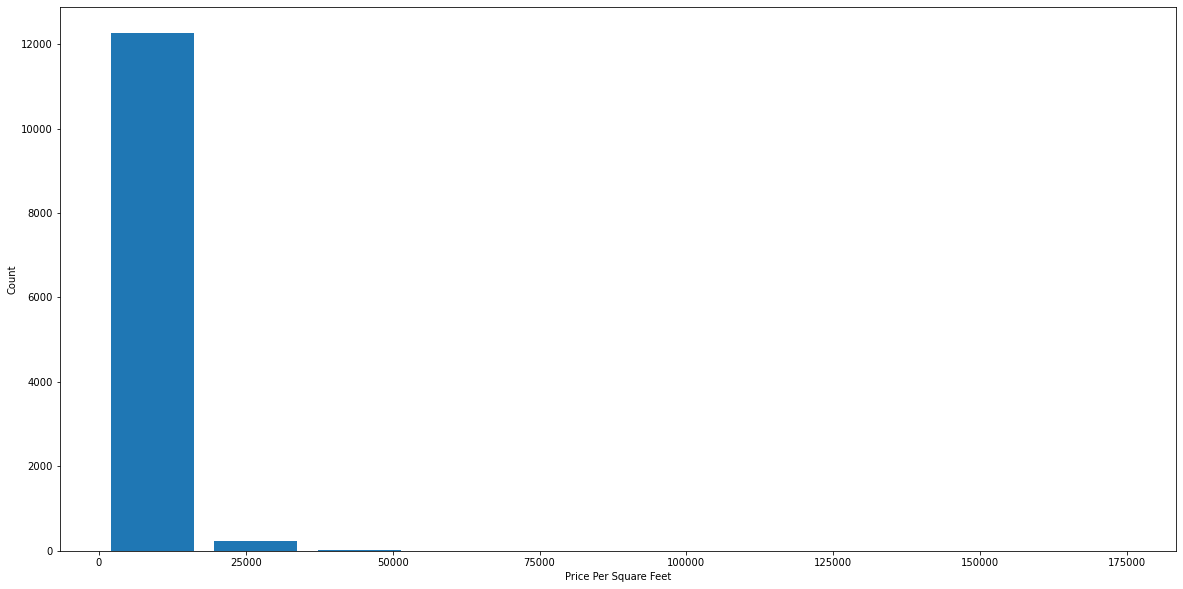

In [31]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df2.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### price per sqrt not normal distribution .Here we find that min price per sqft is 267 rs/sqft whereas max is 176470 , this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [32]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3 = remove_pps_outliers(df2)
df3.shape

(10290, 7)

Text(0, 0.5, 'Count')

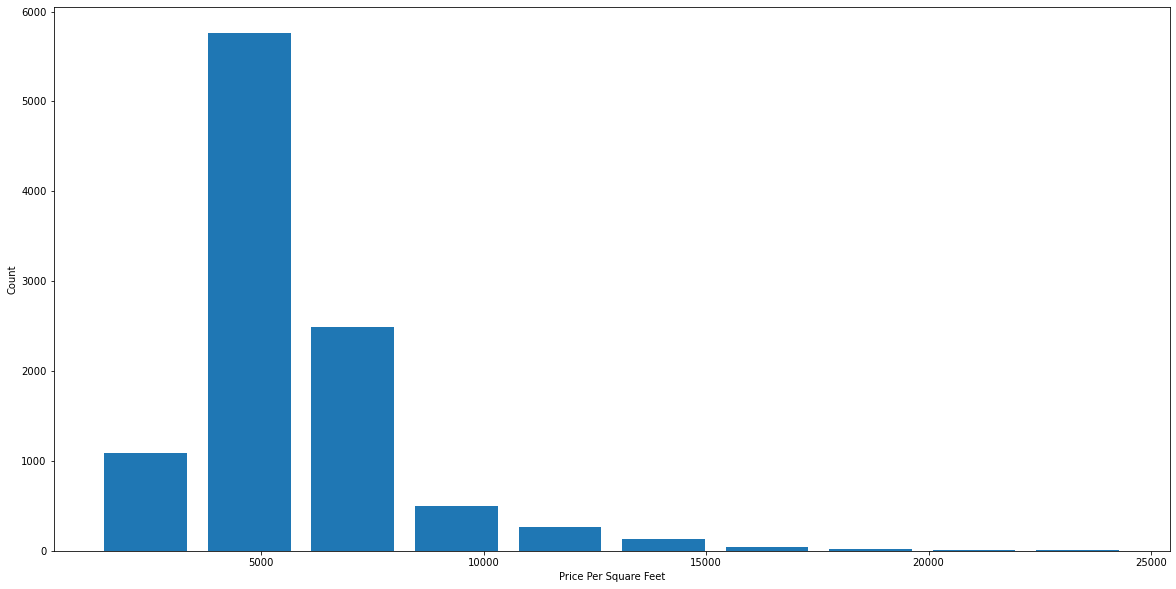

In [33]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df3.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

#### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

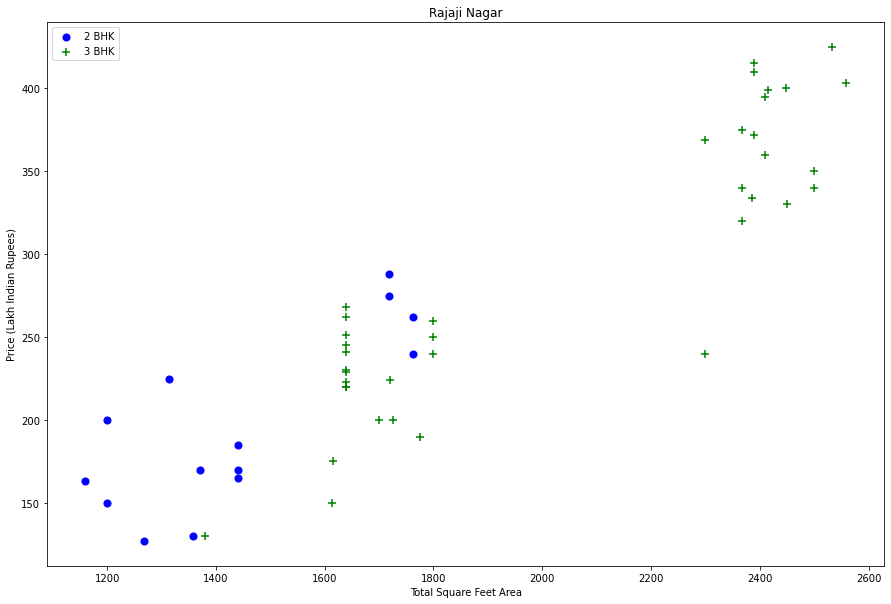

In [34]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df3,"Rajaji Nagar")

### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area)

In [35]:
# Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df4 = remove_bhk_outliers(df3)
# df8 = df7.copy()
df4.shape

(7354, 7)

Text(0, 0.5, 'Count')

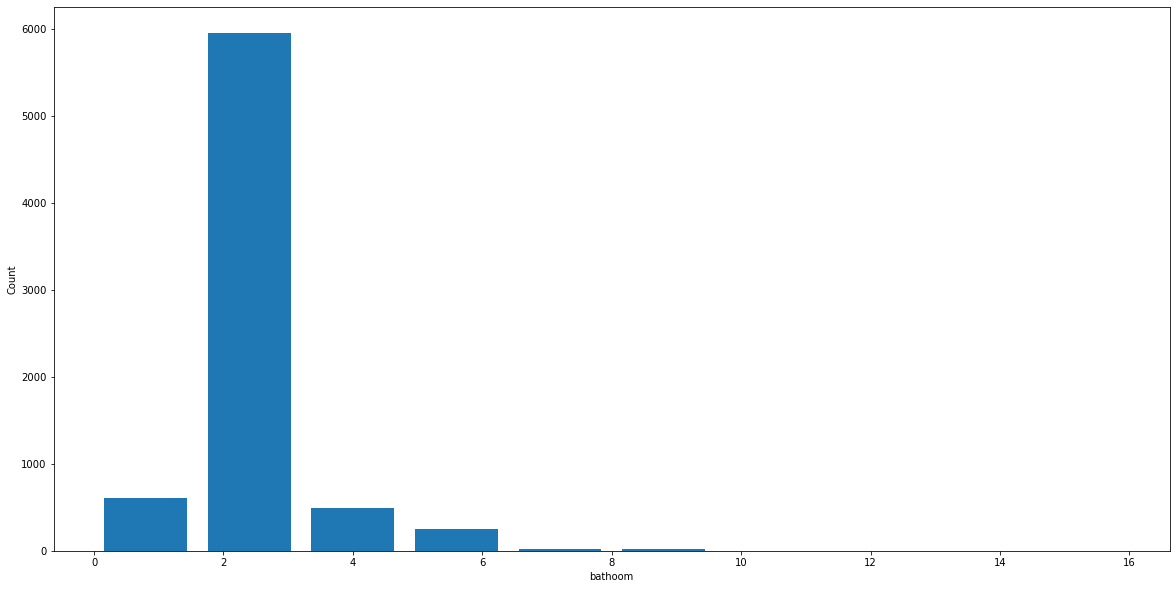

In [36]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel("bathoom")
plt.ylabel("Count")

# now data is cleaning  and save a csv file

In [37]:
df4.to_csv("C:\\Users\\ccpoint\\Downloads\\Bengaluru_House_Data_usualdata.csv",index=False)

In [39]:
ss=pd.read_csv("C:\\Users\\ccpoint\\Downloads\\Bengaluru_House_Data_usualdata.csv")
ss

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
1,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
2,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
3,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
4,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699
...,...,...,...,...,...,...,...
7349,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
7350,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
7351,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
7352,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [40]:
ss.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
BHK               0
price_per_sqft    0
dtype: int64